In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart1.csv')
df=df.drop(['chol', 'fbs','restecg'], axis=1)

In [4]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [165]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini',
                                    random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [167]:
y_pred = classifier.predict(X_test)

In [168]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[25  8]
 [ 8 35]]


In [169]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Train accuracy 100.00%


In [170]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 78.95%


In [171]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes= 7, max_depth= 4, min_samples_leaf=4, 
                                    random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, min_samples_leaf=4,
                       random_state=0)

In [172]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))


Train accuracy 86.34%


In [173]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 76.32%


In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='gini',random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [16]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Train accuracy 99.12%


In [17]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 82.89%


In [21]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='gini',random_state=0, max_features= 8, max_depth=10,
                                   min_samples_leaf=3)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=3,
                       n_estimators=20, random_state=0)

In [22]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Train accuracy 94.27%


In [23]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 82.89%


In [94]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,max_features= 1,random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(max_features=1, n_estimators=20, random_state=0)

In [95]:
print('Train accuracy {:.2f}%'.format(classifier.score(X_train,y_train)*100))

Train accuracy 99.56%


In [96]:
print('Test accuracy {:.2f}%'.format(classifier.score(X_test,y_test)*100))

Test accuracy 86.84%


In [133]:
from sklearn.tree import DecisionTreeClassifier
dt_scores = []
for i in range(1,11):
    dt_classifier = DecisionTreeClassifier(max_features = i,max_depth=5,random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))
dt_scores = np.array(dt_scores)

dt_scores = dt_scores.round(4)

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

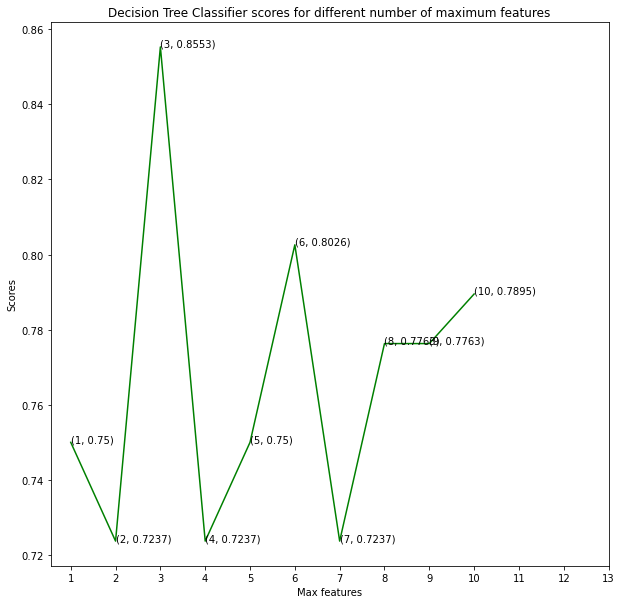

In [135]:
plt.figure(figsize=(10, 10))
plt.plot([i for i in range(1, 11)], dt_scores, color = 'green')
for i in range(1, 11):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X_test[0]) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [25]:
len(X_test[0])

13

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i,max_features= 1,max_depth=4,random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))
rf_scores = np.array(rf_scores)
rf_scores = rf_scores.round(4)

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

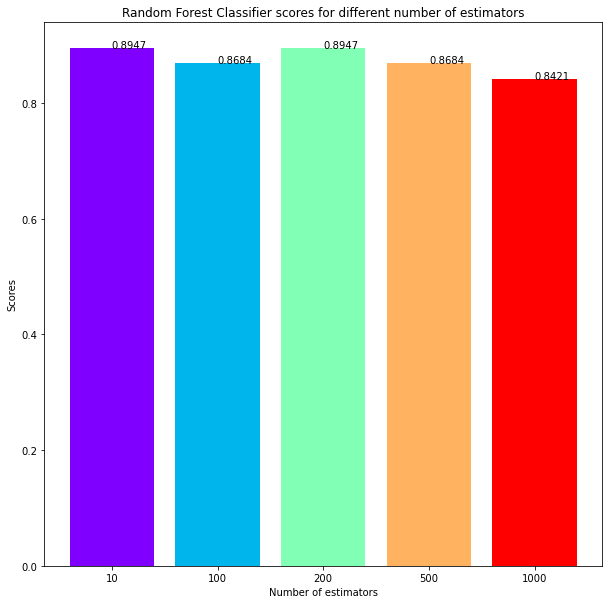

In [132]:
plt.figure(figsize=(10, 10))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [174]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='gini', max_leaf_nodes= 7, max_depth= 4, min_samples_leaf=4, 
                                    random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=7, min_samples_leaf=4,
                       random_state=0)

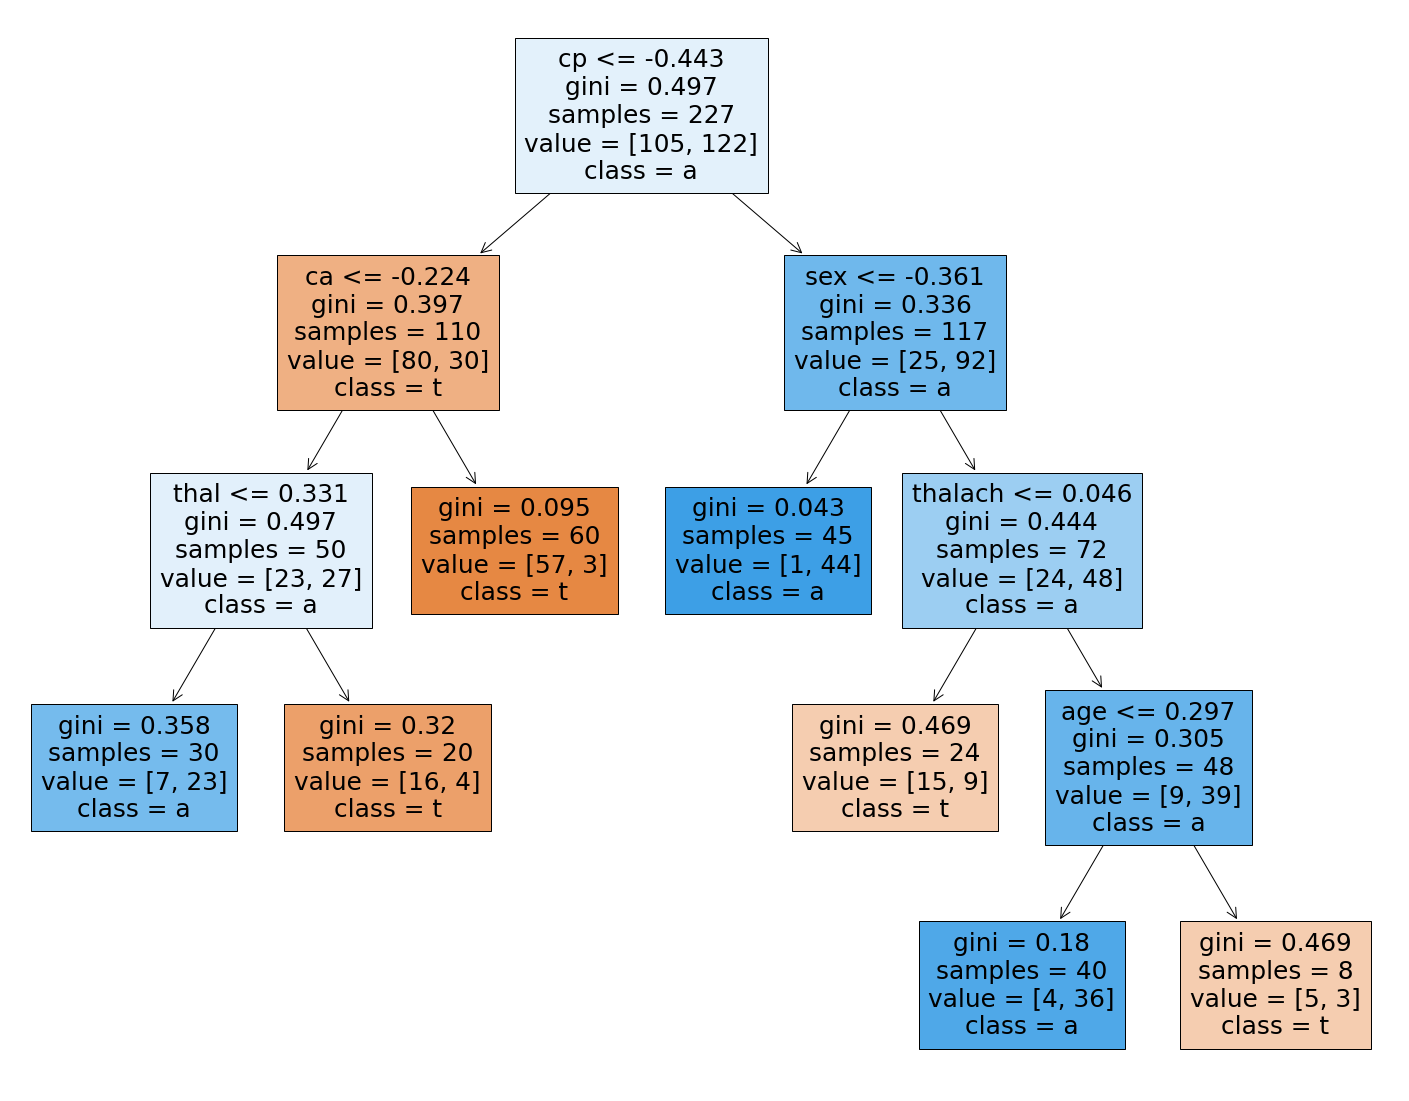

In [175]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, 
                   feature_names=a[0:10],  
                   class_names=a[10],
                   filled=True)